# World Cup 23 - Sweden Expected Goals

In [21]:
from statsbombpy import sb
import matplotlib.pyplot as plt
from northpitch.pitch import Pitch

In [11]:
matches = sb.matches(competition_id = 72, season_id = 107)
events = sb.events(matches.match_id[13])

/Users/ilariazanoni/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
/Users/ilariazanoni/anaconda3/lib/python3.11/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [7]:
swe_events = events[events["team_id"]==858]
swe_shots = swe_events.loc[swe_events['type'] == 'Shot']
print(f"Out of {len(events)} events, {len(swe_shots)} are shots made by Sweden.")

Out of 4373 events, 16 are shots made by Sweden.


In [8]:
swe_shots = swe_shots[['shot_outcome', 'shot_statsbomb_xg', 'location', 'shot_body_part']]
swe_shots

,shot_outcome,shot_statsbomb_xg,location,shot_body_part
4249,Blocked,0.081143,"[103.0, 31.3]",Left Foot
4252,Blocked,0.079030,"[109.0, 41.6]",Right Foot
4258,Blocked,0.028277,"[92.2, 46.0]",Right Foot
4262,Blocked,0.018406,"[101.8, 27.2]",Right Foot
4263,Saved,0.076761,"[106.1, 49.6]",Left Foot
4264,Blocked,0.075739,"[107.4, 44.5]",Right Foot
4265,Wayward,0.039608,"[98.7, 41.2]",Right Foot
4268,Blocked,0.084268,"[112.1, 39.6]",Head
4269,Blocked,0.020097,"[90.3, 43.2]",Right Foot
4279,Goal,0.783500,"[108.1, 40.1]",Left Foot


In [9]:
def extract_x(location):
    return location[0]

def extract_y(location):
    return location[1]

swe_shots['shot_x'] = swe_shots['location'].apply(extract_x)
swe_shots['shot_y'] = swe_shots['location'].apply(extract_y)
swe_shots

,shot_outcome,shot_statsbomb_xg,location,shot_body_part,shot_x,shot_y
4249,Blocked,0.081143,"[103.0, 31.3]",Left Foot,103.0,31.3
4252,Blocked,0.079030,"[109.0, 41.6]",Right Foot,109.0,41.6
4258,Blocked,0.028277,"[92.2, 46.0]",Right Foot,92.2,46.0
4262,Blocked,0.018406,"[101.8, 27.2]",Right Foot,101.8,27.2
4263,Saved,0.076761,"[106.1, 49.6]",Left Foot,106.1,49.6
4264,Blocked,0.075739,"[107.4, 44.5]",Right Foot,107.4,44.5
4265,Wayward,0.039608,"[98.7, 41.2]",Right Foot,98.7,41.2
4268,Blocked,0.084268,"[112.1, 39.6]",Head,112.1,39.6
4269,Blocked,0.020097,"[90.3, 43.2]",Right Foot,90.3,43.2
4279,Goal,0.783500,"[108.1, 40.1]",Left Foot,108.1,40.1


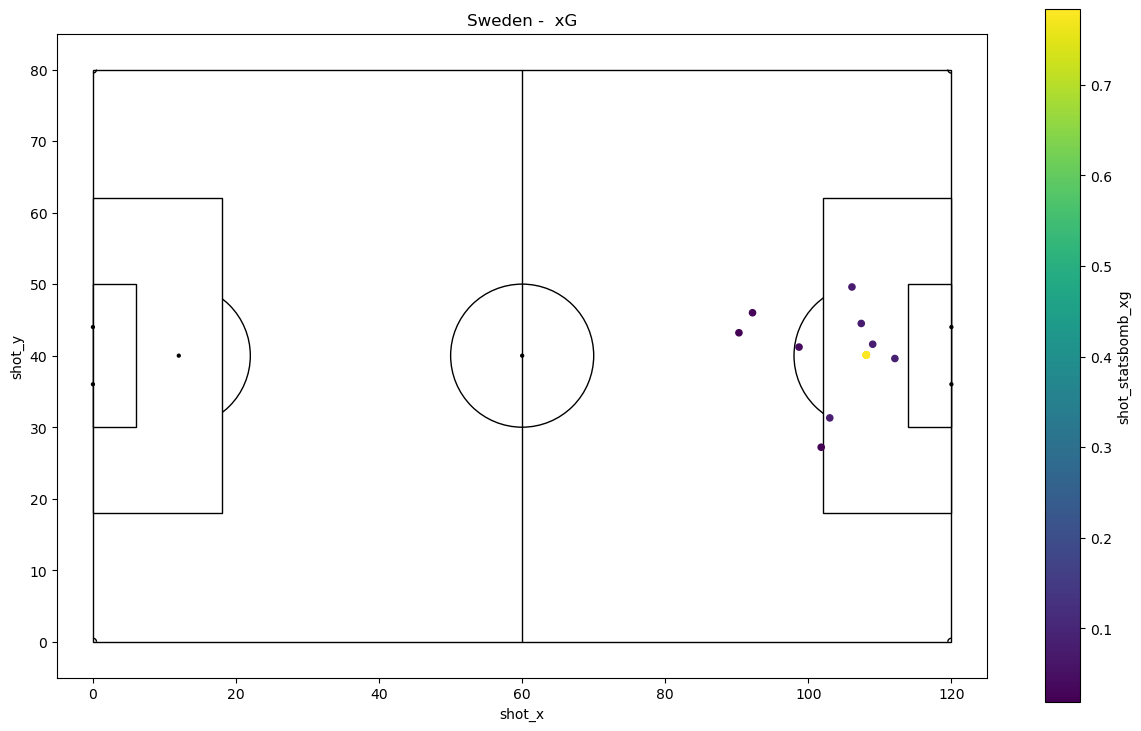

In [10]:
fig, ax = plt.subplots(figsize=(15,9))

pitch = Pitch()
pitch.create_pitch(ax)

plt.ylim(pitch.ylim)
plt.xlim(pitch.xlim)

swe_shots.plot.scatter(x = 'shot_x', y = 'shot_y', c = 'shot_statsbomb_xg', colormap = 'viridis', ax = ax, zorder=2)
plt.title("Sweden -  xG")

plt.show()